In [1]:
f= open('sat.trn','r')

In [2]:
import numpy as np

In [3]:
x_train=np.genfromtxt(f,dtype=int)

In [4]:
print(x_train)

[[ 92 115 120 ... 113  87   3]
 [ 84 102 106 ... 104  79   3]
 [ 84 102 102 ... 104  79   3]
 ...
 [ 68  75 108 ... 104  85   4]
 [ 71  87 108 ... 104  85   4]
 [ 71  91 100 ... 100  81   4]]


In [5]:
x_train.shape

(4435, 37)

In [6]:
y_train=np.take(x_train,indices=36,axis=1)

In [7]:
x_train = np.delete(x_train, -1, axis=1)

In [8]:
print(x_train)

[[ 92 115 120 ... 107 113  87]
 [ 84 102 106 ...  99 104  79]
 [ 84 102 102 ...  99 104  79]
 ...
 [ 68  75 108 ... 100 104  85]
 [ 71  87 108 ...  91 104  85]
 [ 71  91 100 ...  91 100  81]]


In [9]:
f.close()
f= open('sat.tst','r')

In [10]:
x_test=np.genfromtxt(f,dtype=int)

In [11]:
print(x_test)

[[ 80 102 102 ... 113  87   3]
 [ 76 102 102 ... 104  83   3]
 [ 80  98 106 ...  96  75   4]
 ...
 [ 56  68  91 ...  92  74   5]
 [ 56  68  87 ...  92  70   5]
 [ 60  71  91 ... 108  92   5]]


In [12]:
x_test.shape

(2000, 37)

In [13]:
y_test=np.take(x_test,indices=36,axis=1)

In [14]:
x_test = np.delete(x_test, -1, axis=1)

In [15]:
print(x_test)

[[ 80 102 102 ... 107 113  87]
 [ 76 102 102 ... 103 104  83]
 [ 80  98 106 ...  95  96  75]
 ...
 [ 56  68  91 ...  83  92  74]
 [ 56  68  87 ...  83  92  70]
 [ 60  71  91 ...  79 108  92]]


In [16]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
tsne = TSNE()
X_embedded = tsne.fit_transform(x_train)


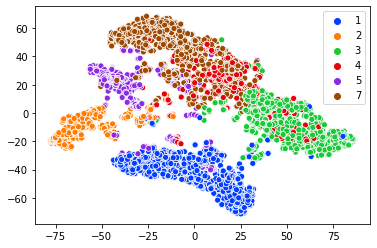

In [18]:
palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, palette=palette)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=1)

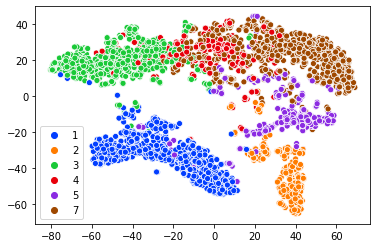

In [20]:
X_embedded = tsne.fit_transform(x_train)

palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, palette=palette)

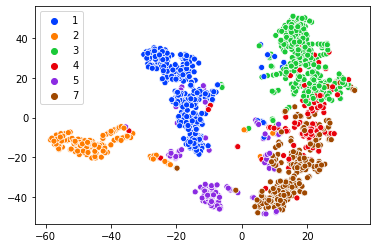

In [21]:
X_embedded = tsne.fit_transform(x_val)

palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_val, palette=palette)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

{'n_neighbors': 3}
0.8981980156874968


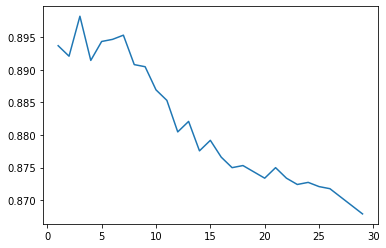

In [23]:

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)

#check top performing n_neighbors value
print(knn_gscv.best_params_)
# {'n_neighbors': 6}
print(knn_gscv.best_score_)
# 0.98

plt.plot(knn_gscv.cv_results_['param_n_neighbors'].data, knn_gscv.cv_results_['mean_test_score'])

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
pred = knn.predict(x_val)

# evaluate accuracy

print('\nThe accuracy of the classifier is {}%'.format(accuracy_score(y_val, pred)*100))
#The accuracy of the classifier is 98.0%


The accuracy of the classifier is 90.45830202854997%
